In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#load the data file
df = pd.read_csv(r"./Telco-Customer-Churn.csv", dtype={'SeniorCitizen': 'category', 'Churn': 'category'})
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric,errors='coerce')
df = df.reset_index()

In [4]:
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#getting to know more about the data
print("Shape:{}".format(df.shape))
print("Column Type")
print(df.info())
print("Desc. Statistics:")
print(df.describe())
print("Null Column")
print(df.isnull().sum())
print("Duplicated")
print(df.duplicated().sum())


Shape:(7043, 22)
Column Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             7043 non-null   int64   
 1   customerID        7043 non-null   object  
 2   gender            7043 non-null   object  
 3   SeniorCitizen     7043 non-null   category
 4   Partner           7043 non-null   object  
 5   Dependents        7043 non-null   object  
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   object  
 8   MultipleLines     7043 non-null   object  
 9   InternetService   7043 non-null   object  
 10  OnlineSecurity    7043 non-null   object  
 11  OnlineBackup      7043 non-null   object  
 12  DeviceProtection  7043 non-null   object  
 13  TechSupport       7043 non-null   object  
 14  StreamingTV       7043 non-null   object  
 15  StreamingMovies   7043 non-null   object  


In [6]:
df = df.query('TotalCharges > 0')
df.shape

(7032, 22)

In [7]:
df['Churn'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Text(0.5, 1.01, 'Count of TARGET Variable per category')

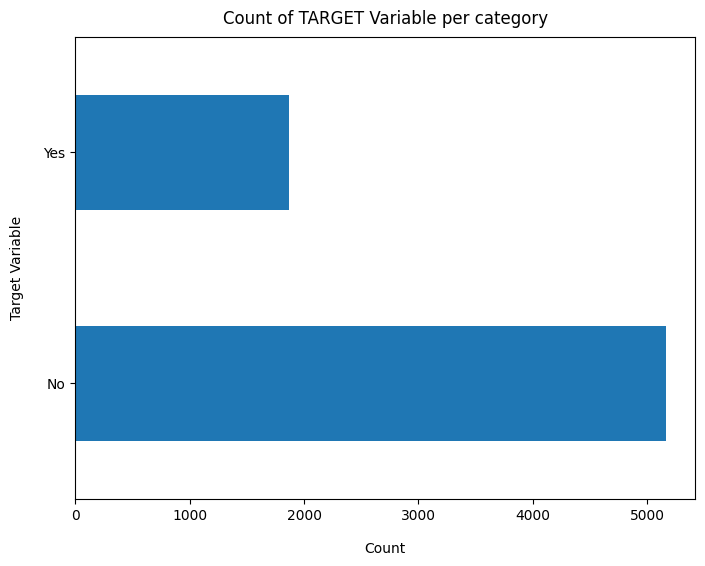

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad = 14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.01)

In [9]:
print('VALUE COUNTS'.center(70,'-'))
print(df['Churn'].value_counts())
print('COMPOSITION'.center(70,'-'))
print(df['Churn'].value_counts()/len(df['Churn'])*100)

-----------------------------VALUE COUNTS-----------------------------
Churn
No     5163
Yes    1869
Name: count, dtype: int64
-----------------------------COMPOSITION------------------------------
Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64


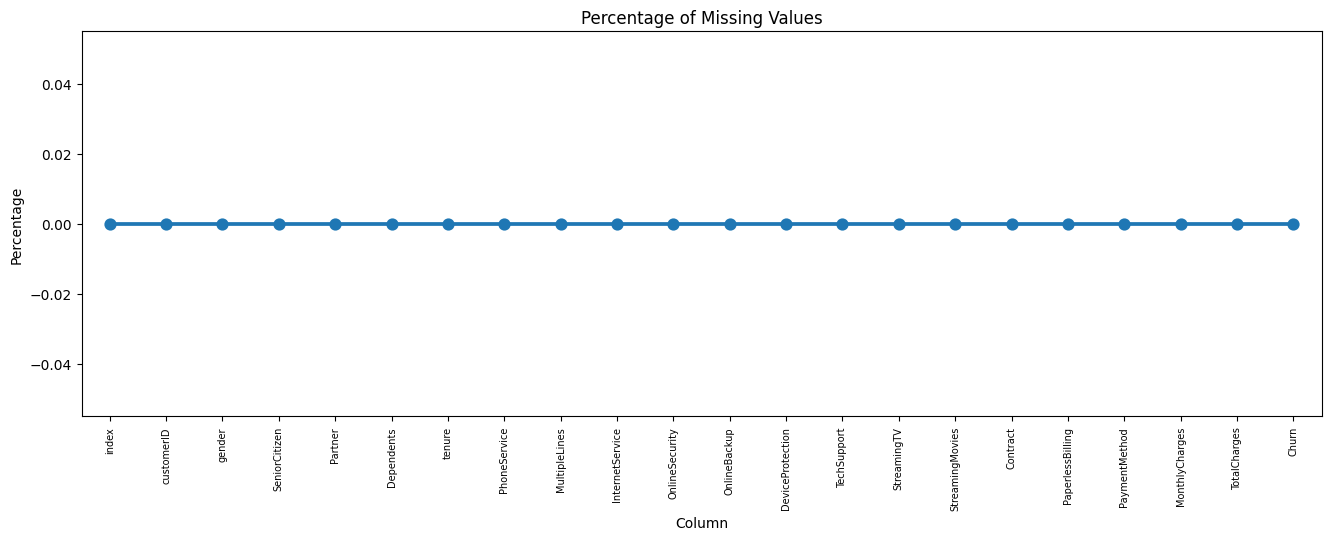

In [10]:
#percentage of missing data
missing = pd.DataFrame({'Column': df.columns, 'Percentage Missing':(df.isnull().sum()*100/len(df))})
plt.figure(figsize=(16,5))
ax=sns.pointplot(x='Column',y='Percentage Missing',data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

In [11]:
#dividing the customer into bins based on tenure (grouping it by year)

#checking the max tenure
df['tenure'].max() #72

#group the tenure in bins of 12 months

labels = ["{0} - {1}".format (i, i+11) for i in range (1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right = False, labels=labels)

In [12]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [13]:
#drop irrelevant column

df.drop(columns =['customerID','tenure'], axis =1, inplace=True)
df.head()

,index,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,1,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,2,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,3,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,4,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


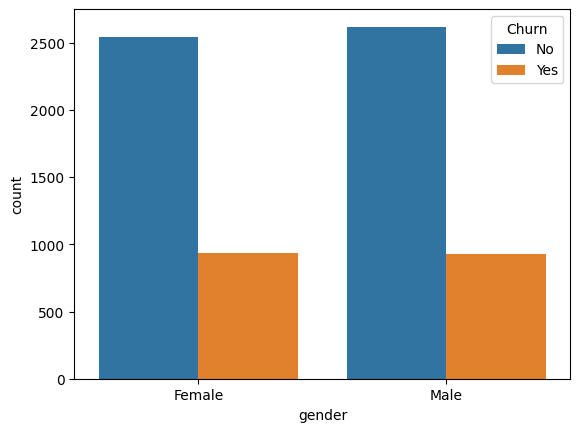

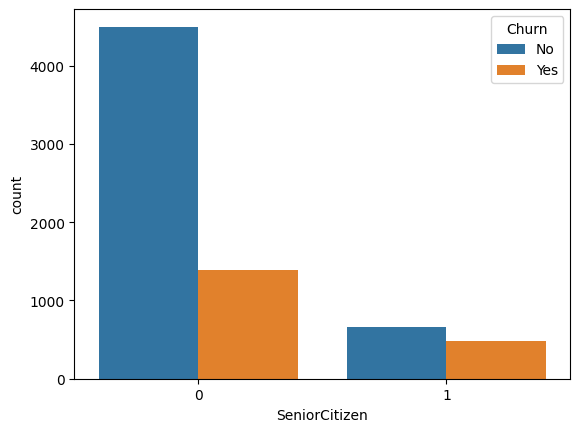

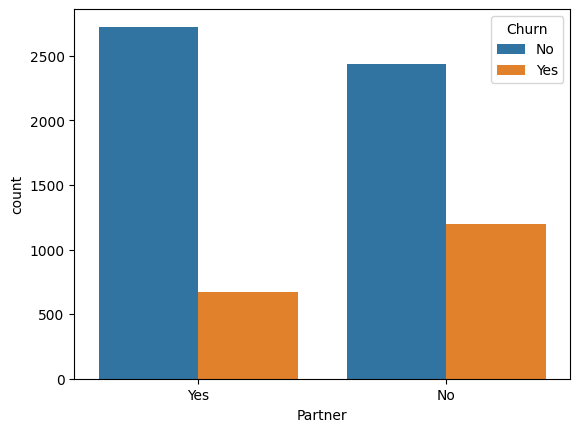

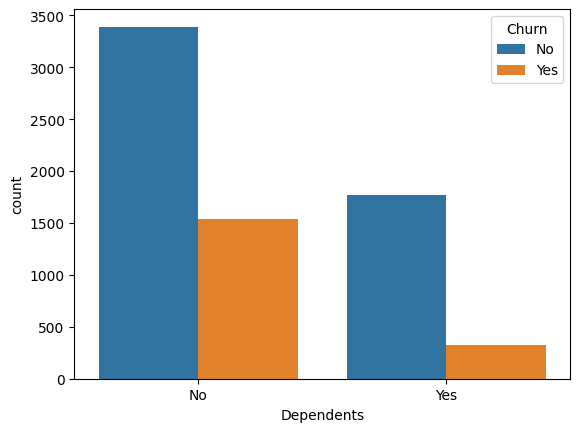

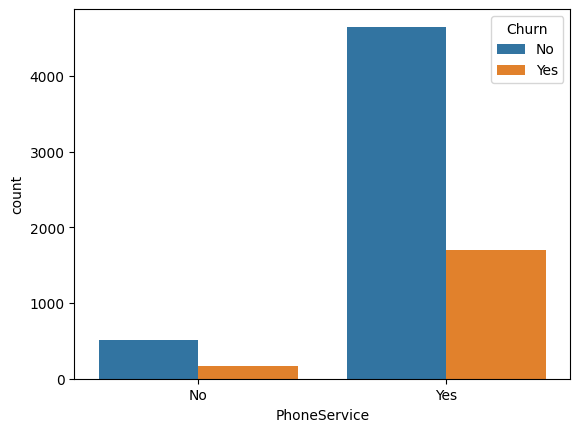

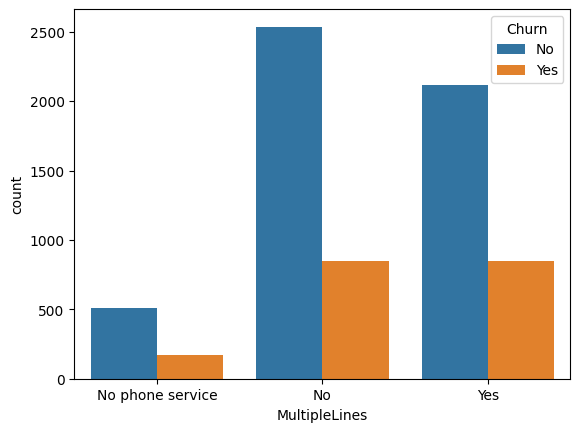

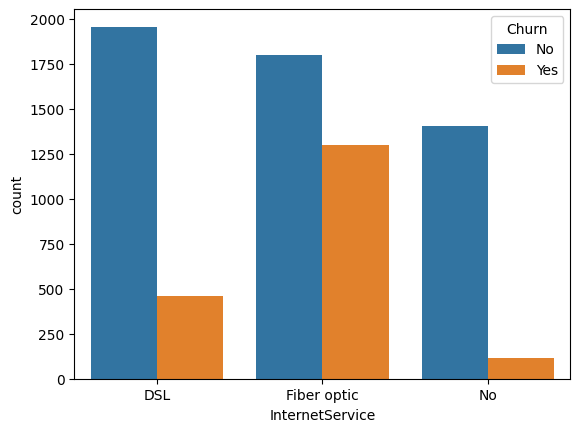

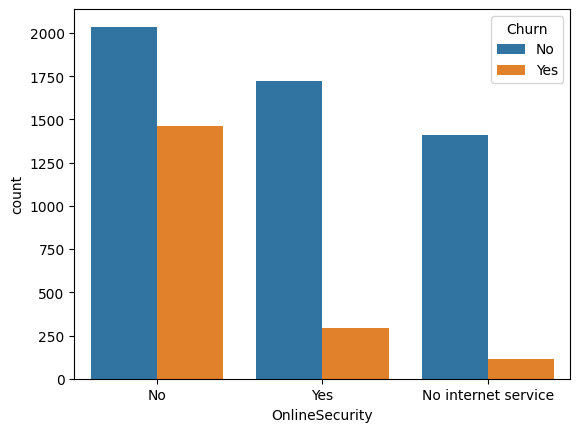

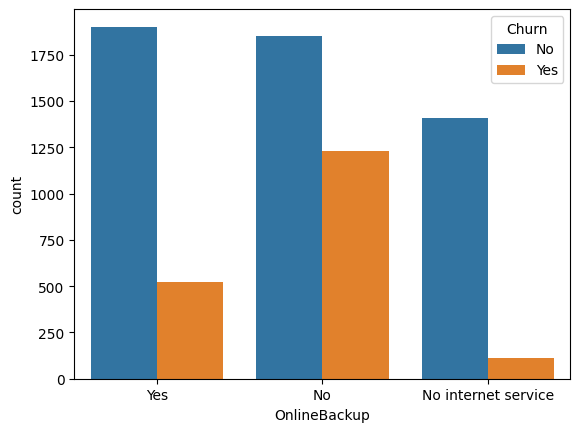

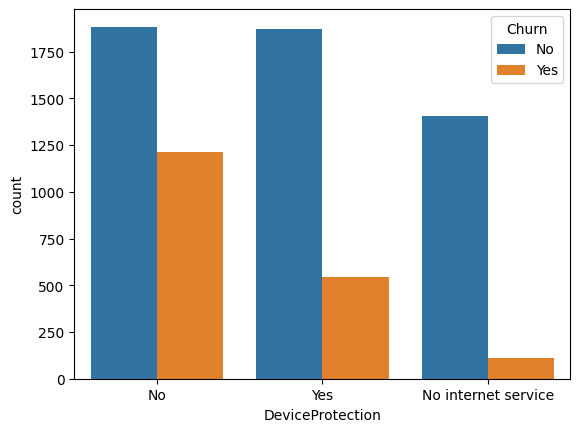

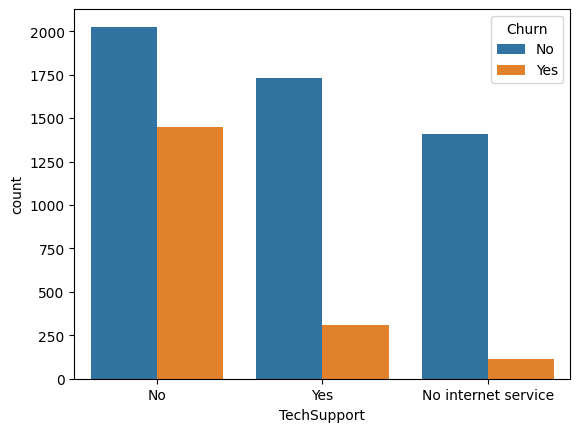

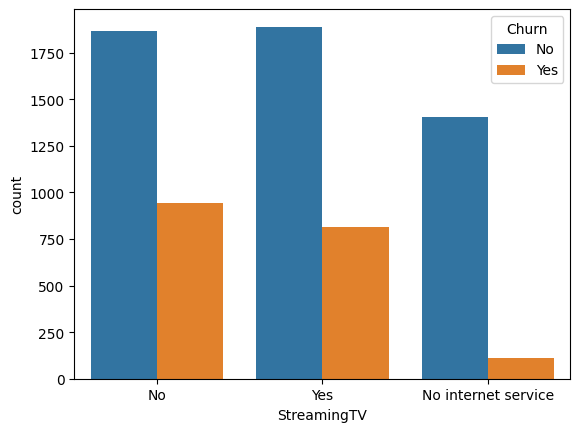

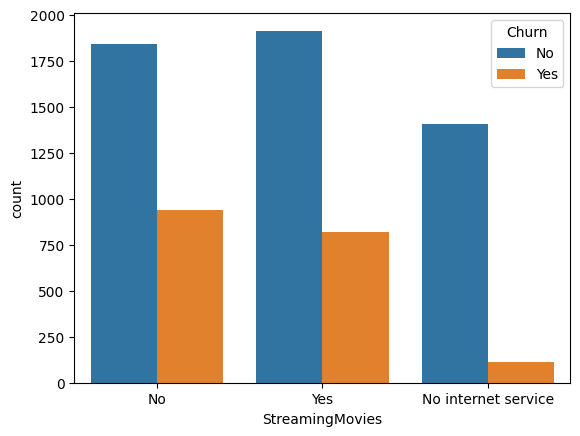

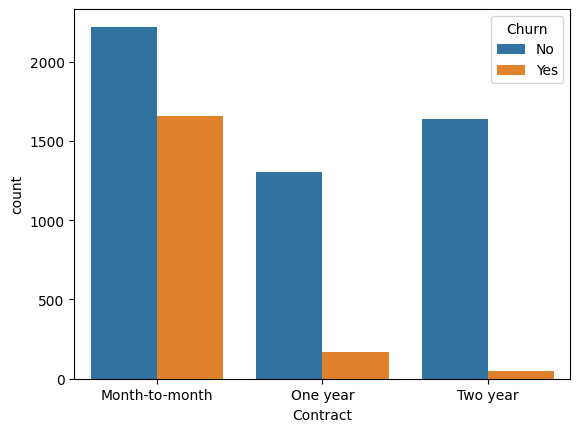

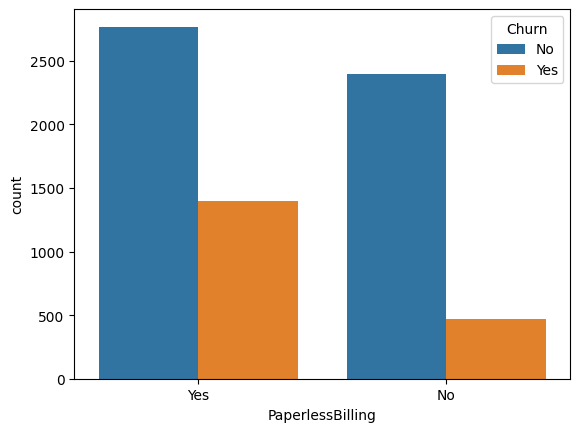

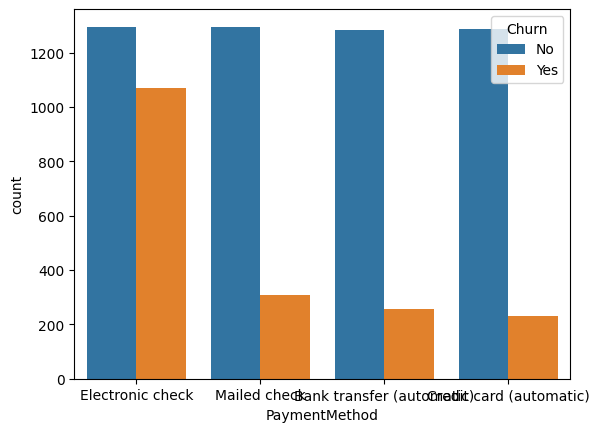

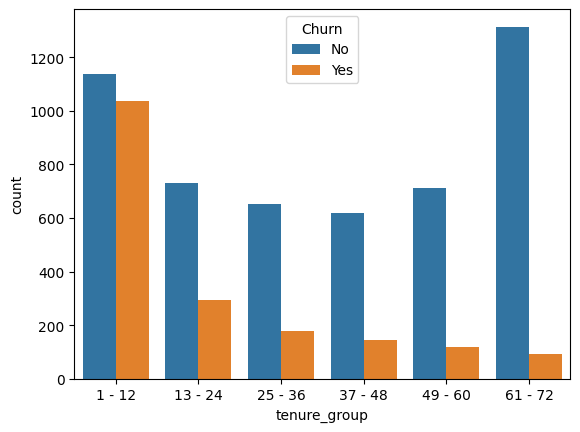

In [14]:
#Data Exploration
#plot distribution of individual predictors by churn
for i, predictor in enumerate (df.drop(columns=['index','Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')
    plt.show()

In [15]:
#convert the target variable 'churn' in a binary numeric variable

df['Churn']= np.where(df.Churn == "Yes",1,0)
df.head()

,index,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,1,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,2,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,3,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,4,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [16]:
#convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df).astype(int)
df_dummies.head()

,index,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


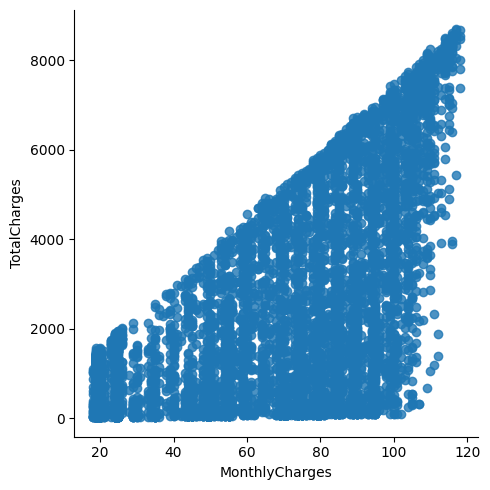

In [17]:
#relationship between monthly charges and total charges

sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

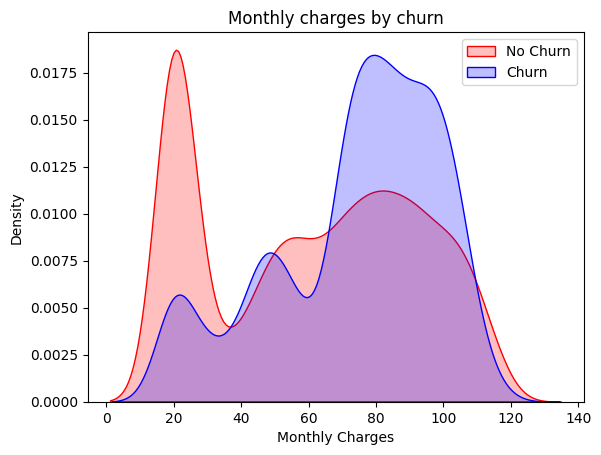

In [18]:
#churn by monthly charges and total charges

mth = sns.kdeplot(df_dummies.MonthlyCharges[(df['Churn']== 0)], color ="Red", shade = True)
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df['Churn']==1)], ax=mth, color='Blue', shade=True)
mth.legend(['No Churn', 'Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

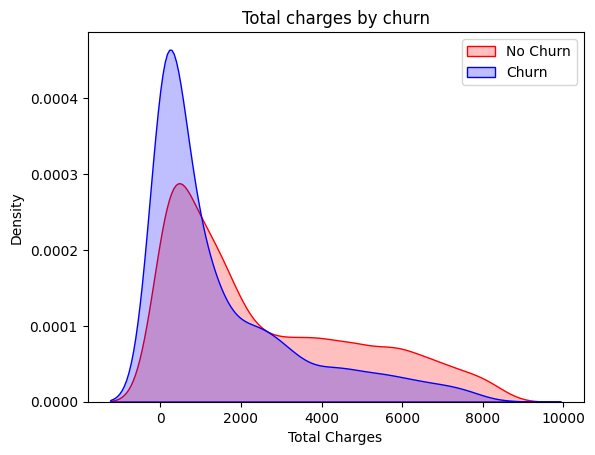

In [19]:
#churn by monthly charges and total charges

mth = sns.kdeplot(df_dummies.TotalCharges[(df['Churn']== 0)], color ="Red", shade = True)
mth = sns.kdeplot(df_dummies.TotalCharges[(df['Churn']==1)], ax=mth, color='Blue', shade=True)
mth.legend(['No Churn', 'Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Total Charges')
mth.set_title('Total charges by churn')

<Axes: >

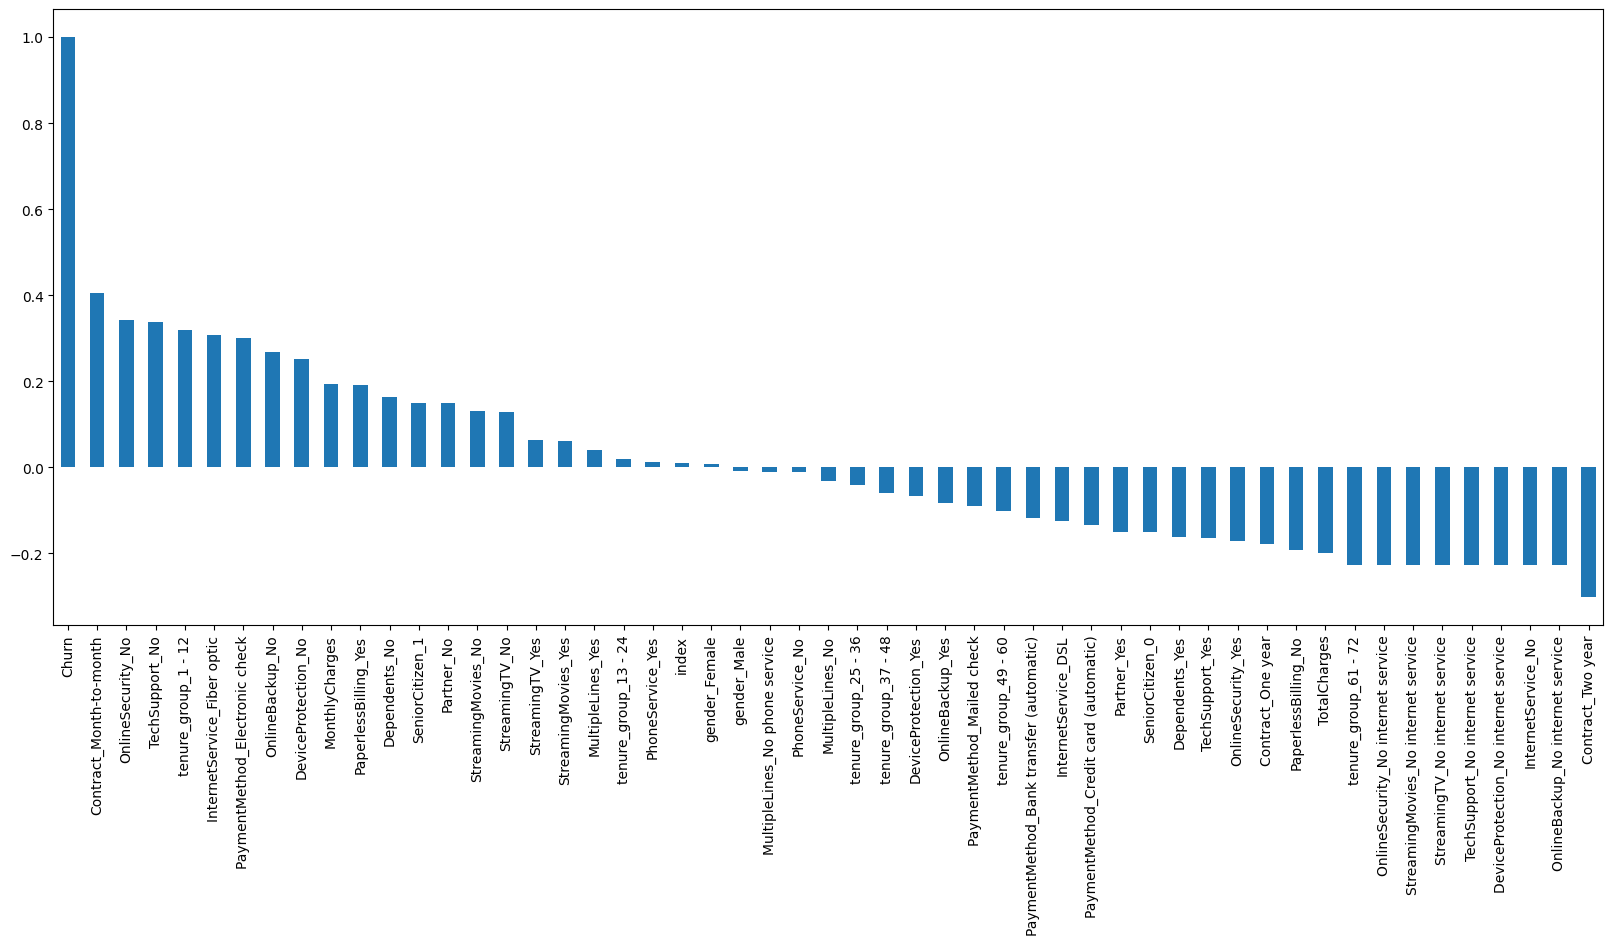

In [20]:
plt.figure(figsize =(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

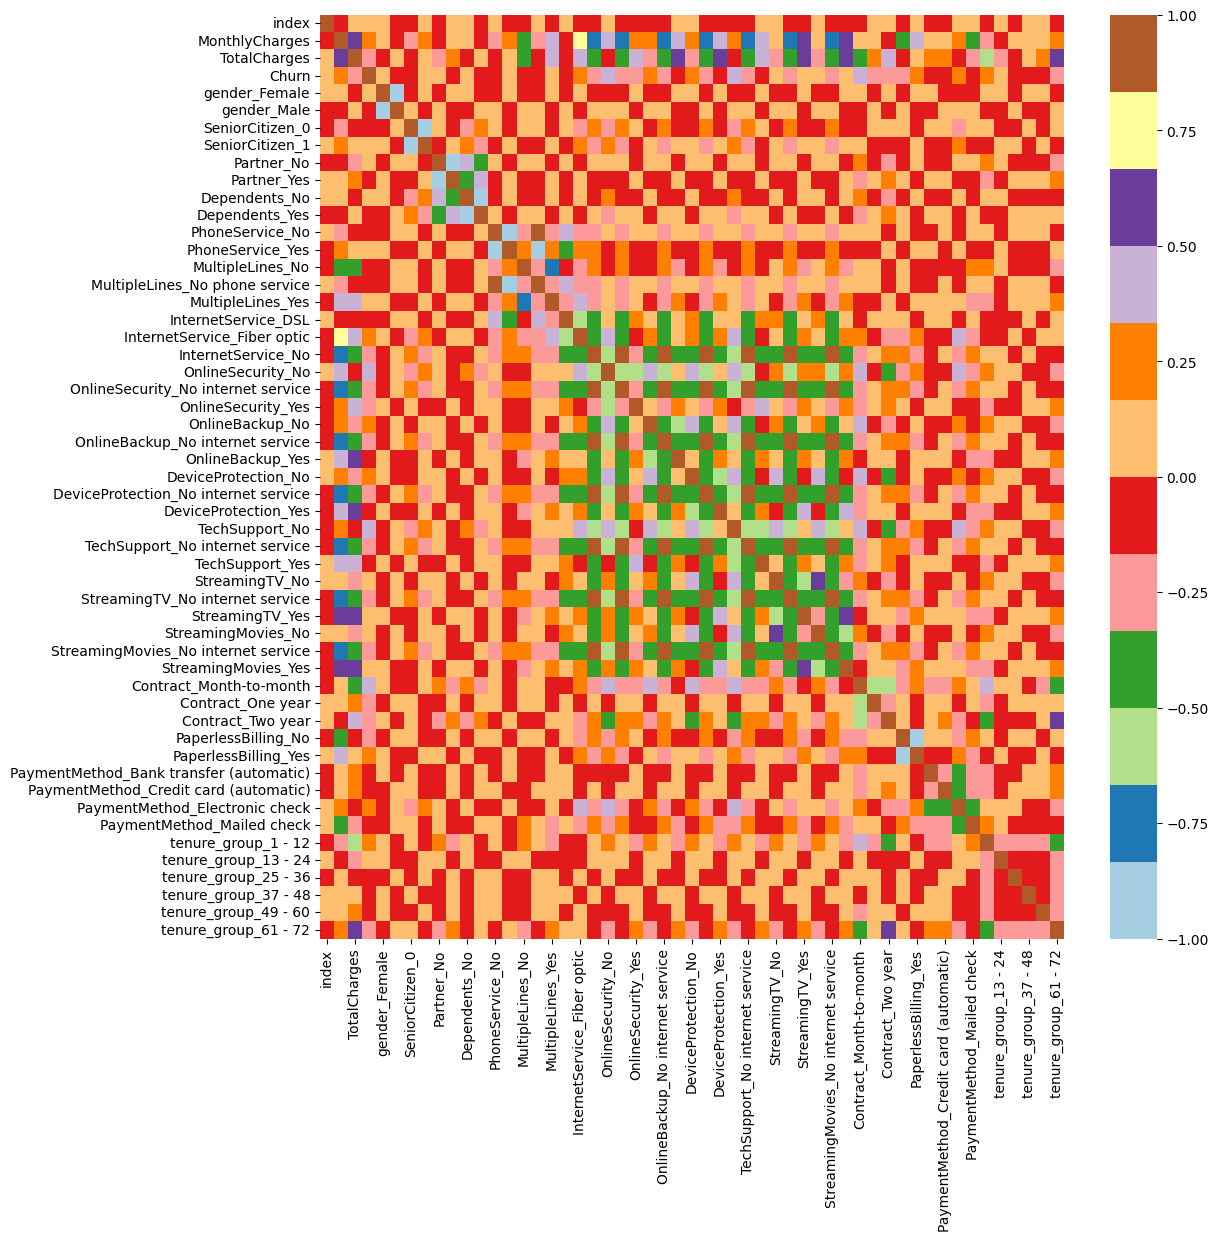

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap='Paired')

In [22]:
#Bivariate analysis

new_df_target0 = df[df['Churn']== 0]
new_df_target1 = df[df['Churn']==1]
new_df_target1.head()

,index,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,2,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,4,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


In [23]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp= pd.Series(data = hue)
    fig, ax= plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x=col, order=df[col].value_counts().index, hue=hue, palette = 'bright')
    plt.show()

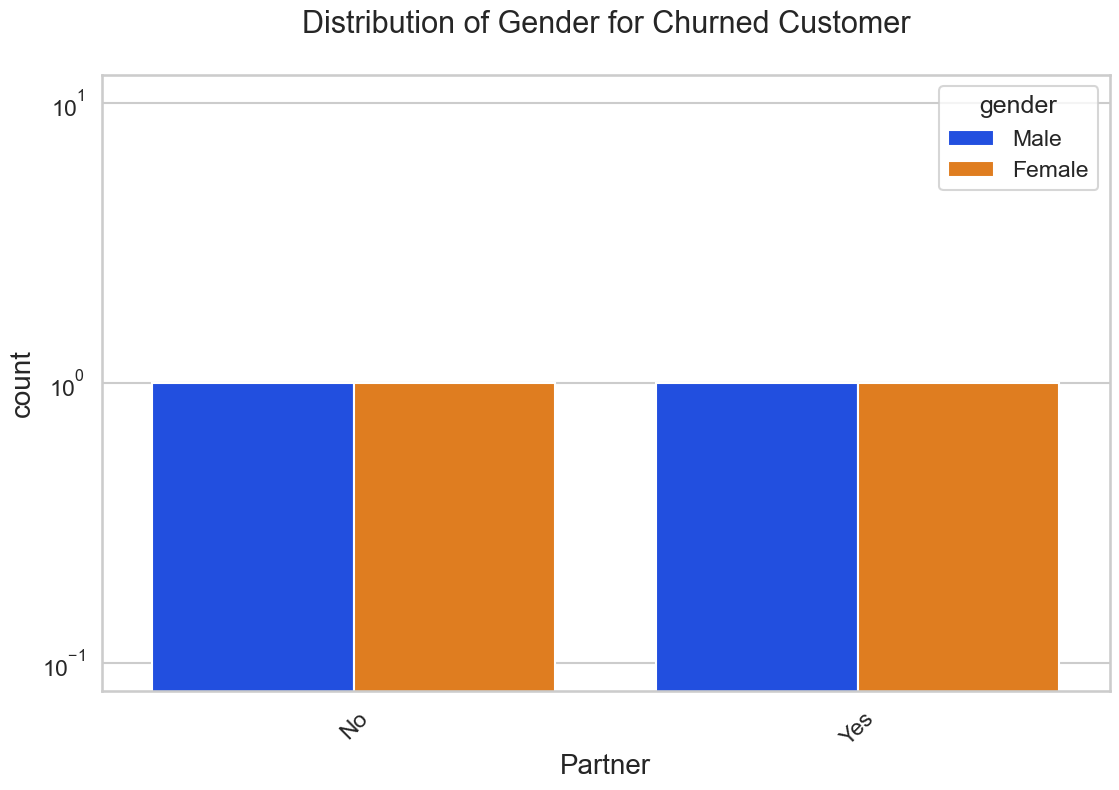

In [24]:
uniplot(new_df_target1, col='Partner', title='Distribution of Gender for Churned Customer', hue ='gender')

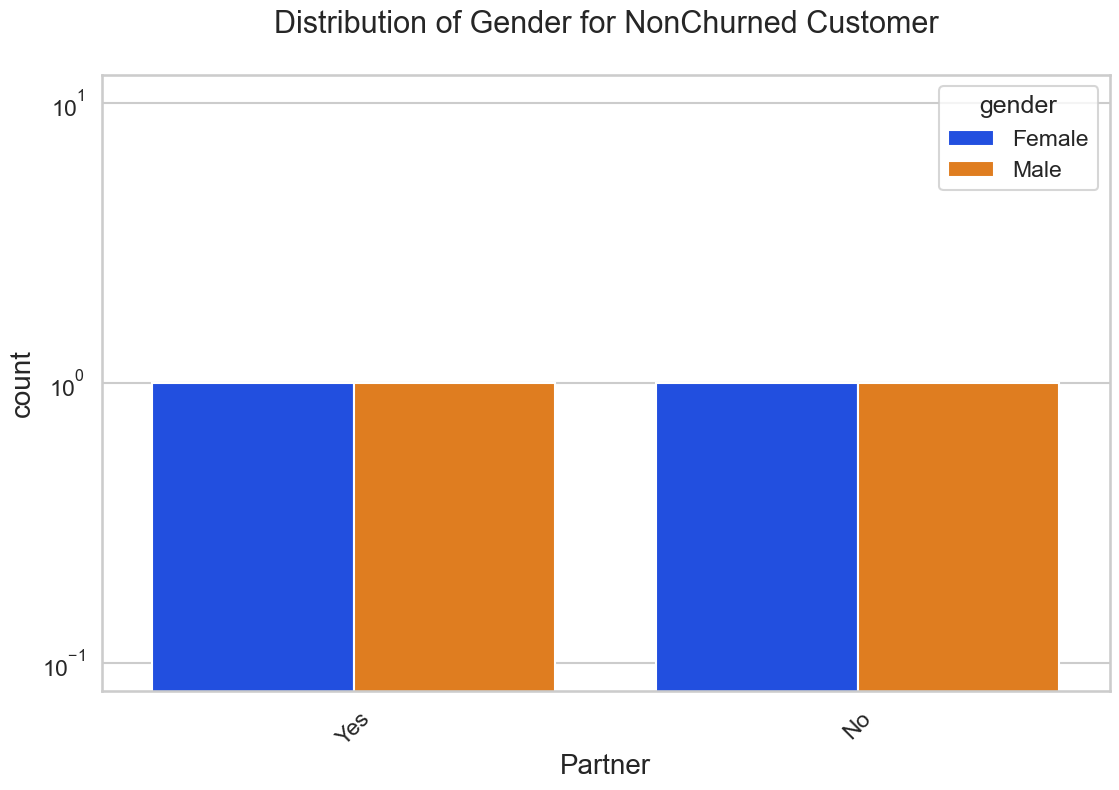

In [25]:
uniplot(new_df_target0,col='Partner',title='Distribution of Gender for NonChurned Customer', hue='gender')

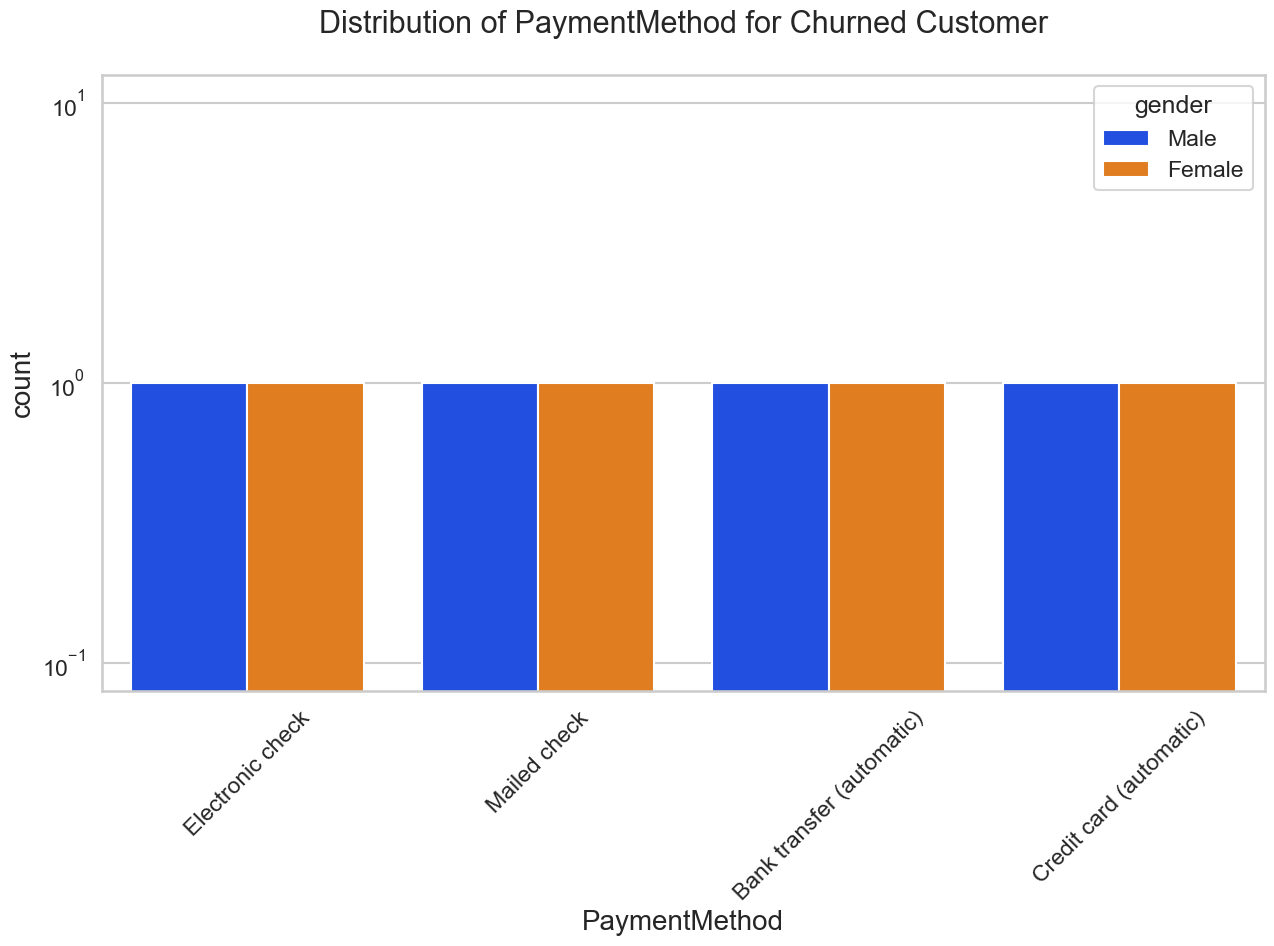

In [26]:
uniplot(new_df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customer', hue='gender')


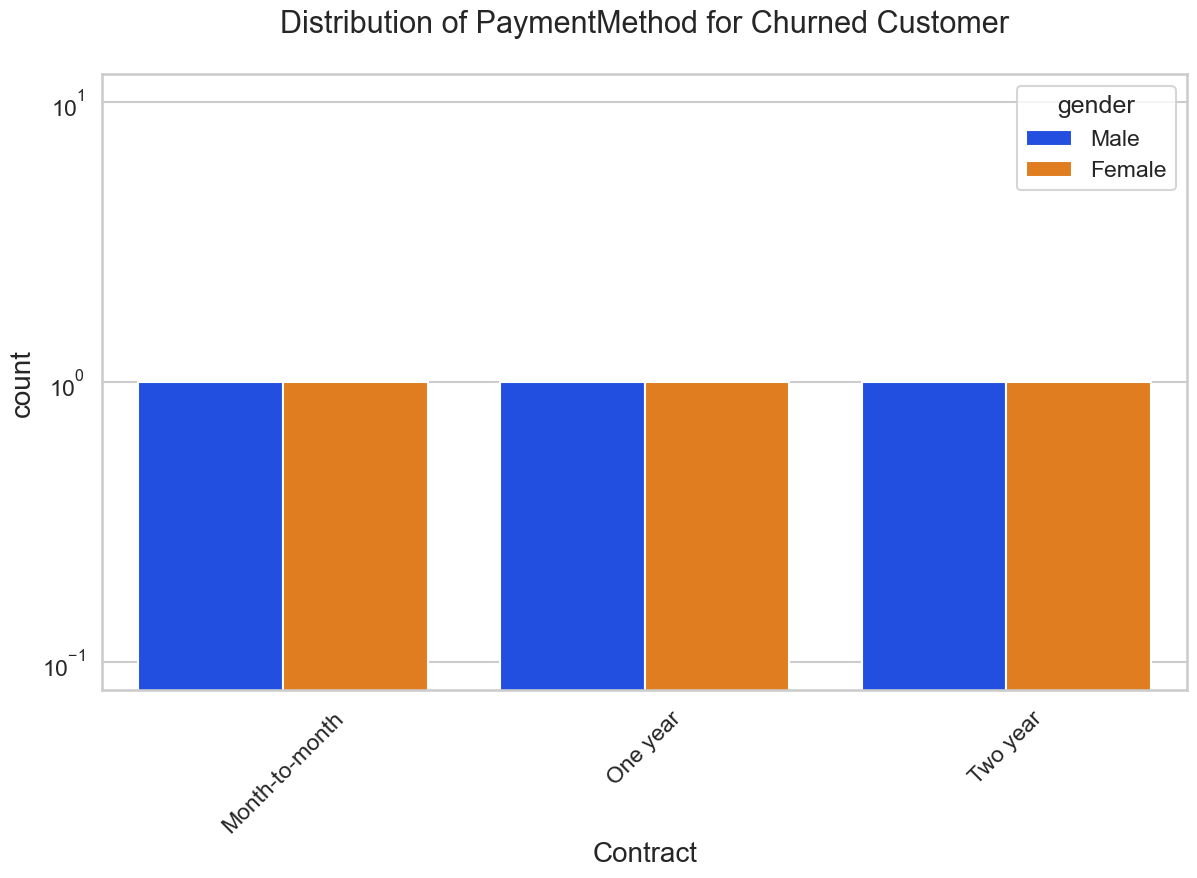

In [27]:
uniplot(new_df_target1,col='Contract',title='Distribution of PaymentMethod for Churned Customer', hue='gender')

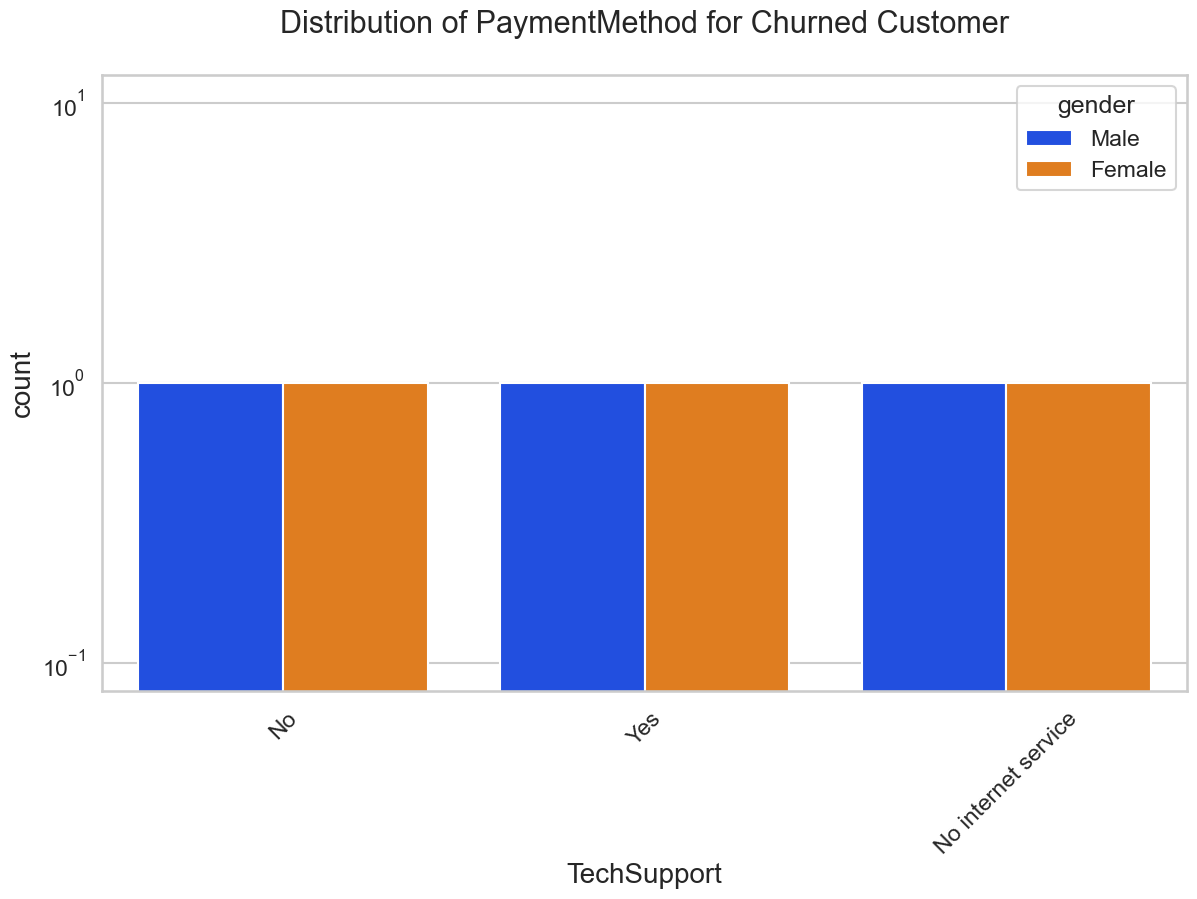

In [28]:
uniplot(new_df_target1,col='TechSupport',title='Distribution of PaymentMethod for Churned Customer', hue='gender')

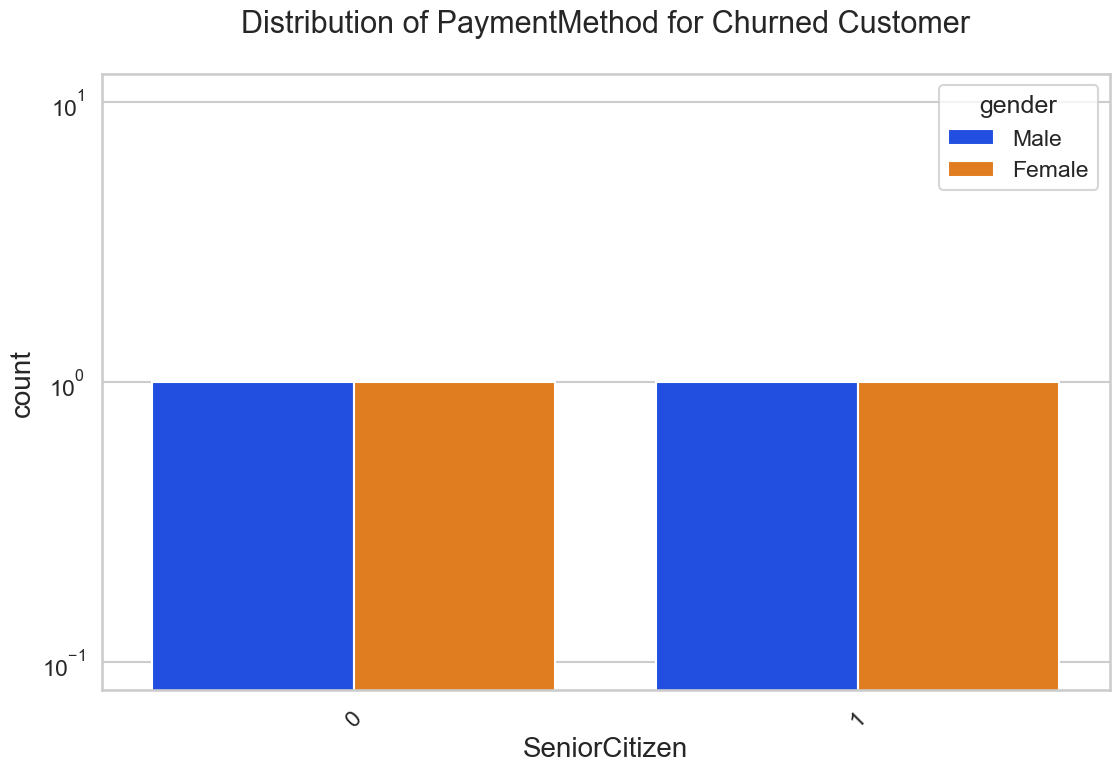

In [29]:
uniplot(new_df_target1,col='SeniorCitizen',title='Distribution of PaymentMethod for Churned Customer', hue='gender')

In [30]:
df_dummies.to_csv('tel_churn.csv')

source: https://www.youtube.com/watch?v=GVECbcKUio4&t=8436s